In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import IsolationForest

from sklearn.datasets import load_boston


In [2]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
# в датасете нет пропусков, нет категориальных переменных, описанных словами

In [7]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

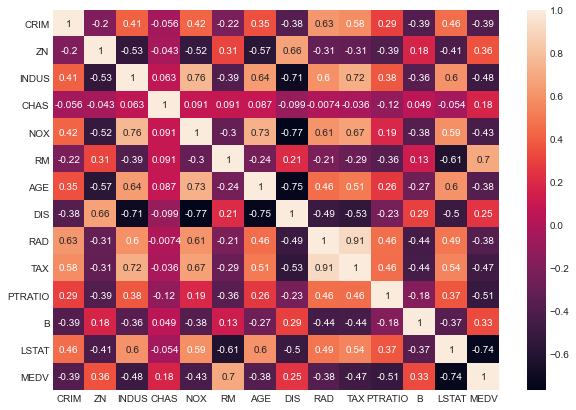

In [5]:
# построим тепловую карту
cor = data.corr()
plt.figure(figsize=(10,7))
sns.heatmap(cor, annot=True)


In [ ]:
# видна сильная корреляция стоимости с чтслом комнат и сильная обратная корреляция с % населения с низким статусом
# далее сравним пизнаки попарно

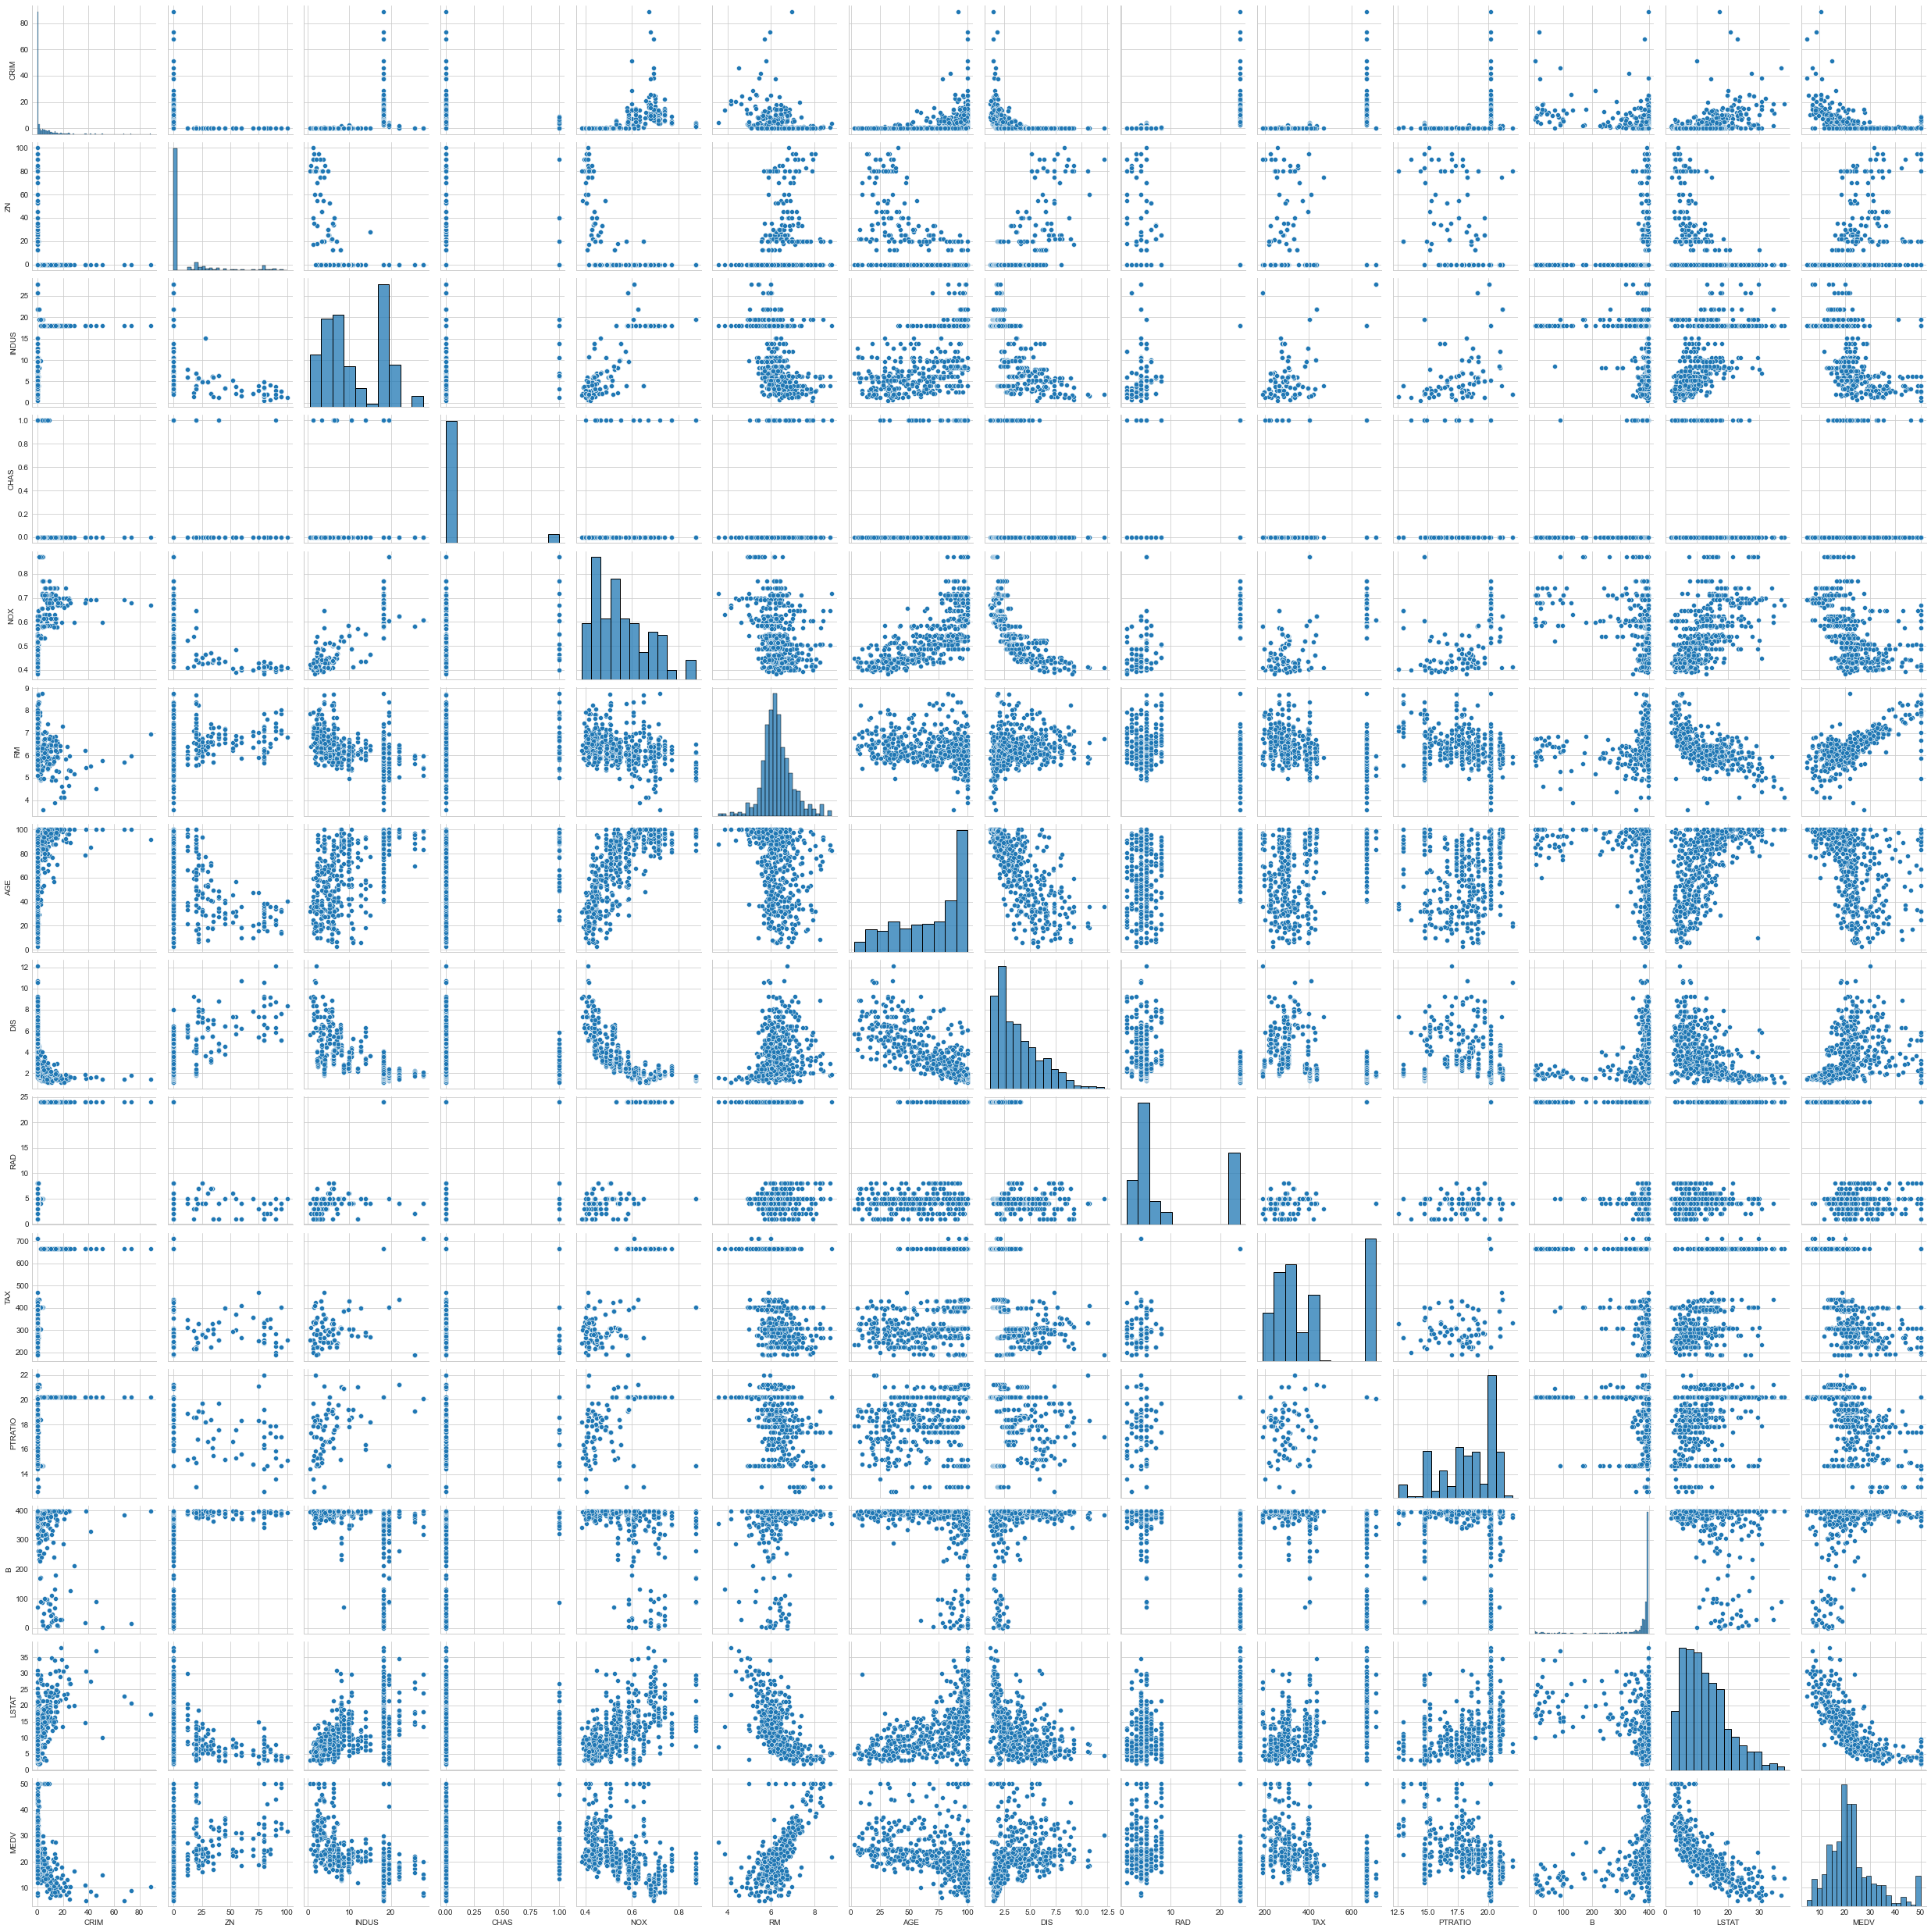

In [13]:
sns.pairplot(data)

In [7]:
# видно, что все жилье высокой стоимости находится в районах с низкой уровнем преступности
# введем новый признак Crime_rate, поделив уровень приступности на высокий и низкий
data["Crime_rate"] = ['low' if i < 10 else 'high' for i in data["CRIM"]]

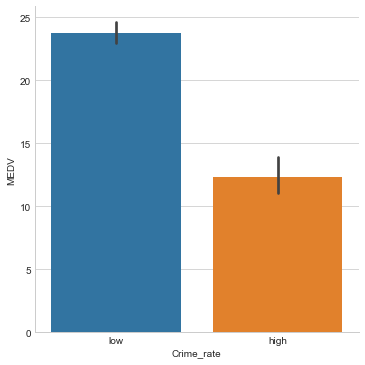

In [8]:
g = sns.factorplot(x = "Crime_rate", y = "MEDV", data = data, kind = "bar")
g.set_ylabels("MEDV")
plt.show()

In [9]:
data = pd.get_dummies(data, columns= ["Crime_rate"], prefix = "C")

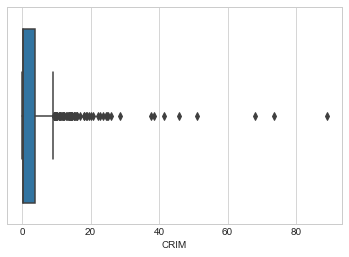

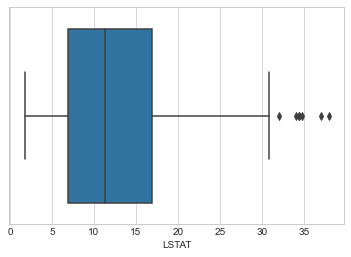

In [105]:
# посмотрим, есть ли выбросы на примере некоторых признаков
def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])
        plt.show()
    pass  

get_boxplot(data,['CRIM','LSTAT'])

In [10]:
# введем признак выброса
def detect_outliers(df,features):
    df['outlier_rang'] = 0
    for c in features:
        Q1 = np.percentile(df[c],25)
        Q3 = np.percentile(df[c],75)
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        df.loc[outlier_list_col, 'outlier_rang'] = df.loc[outlier_list_col, 'outlier_rang'] + 1

    isol_forest = df[IsolationForest().fit_predict(df[features])<0].index
    df.loc[isol_forest, 'outlier_rang'] = df.loc[isol_forest, 'outlier_rang'] + 1
    return df




In [11]:

y = pd.Series(data['MEDV'])
data = detect_outliers(data.drop(labels = ['MEDV'], axis = 1),data.drop(labels = ['MEDV'], axis = 1).columns)   
X = data

In [12]:
# построим можель регрессии
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_predict = model.predict(X_test)

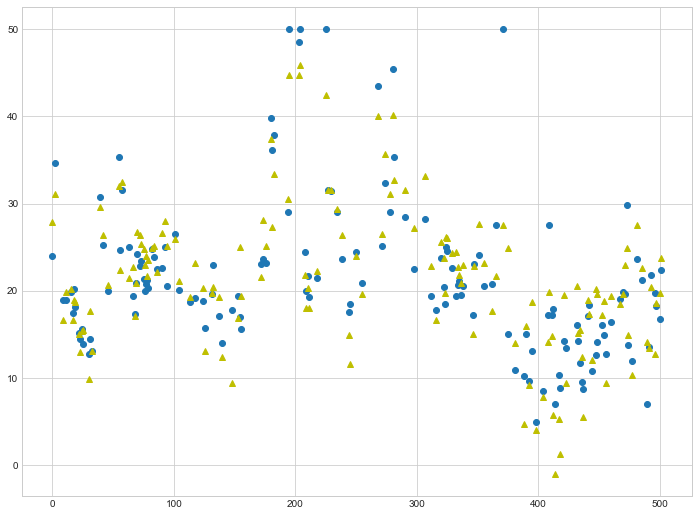

In [17]:
plt.figure(figsize=(12,9))
plt.plot(y_test.index, y_test, 'o')
plt.plot(y_test.index, y_predict, 'y^')
plt.show() 

In [18]:
# оценим качество
model.score(X_test, y_test)

    

0.7846864628818715